# 1. Titanic Dataset: EDA

Автор: 

Дата:

Описание:
----------
В данном этапе выполняется разведочный анализ данных (EDA) на основе датасета пассажиров Титаника.

__Цель разведочного анализа данных (EDA)__ — изучить структуру, качество и содержимое датасета пассажиров Титаника, выявить ключевые закономерности и взаимосвязи между признаками, а также определить факторы, которые могут влиять на выживаемость пассажиров.

В ходе анализа будут:
- выявлены и обработаны пропущенные значения;
- исследованы распределения числовых и категориальных переменных;
- визуализированы связи между признаками и целевой переменной Survived;
- сформулированы предварительные гипотезы для последующего моделирования.

### 1.1 Изучение структуры датасета:

#### 1.1.1: Загрузка датасета:

In [2]:
# Библиотеки используемые для анализа данных:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Загрузка и сохранение датасета в переменную:
df = pd.read_csv('./datasets/titanic_dataset.csv')

# Отображение данных:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Создание копии данных:
df_copy = df.copy()

In [5]:
# Проверка столбцов на наличие пробелов и ошибок
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Ошибки и пробелы в названии столбцов отсутствуют. Названия столбцов удовлетворяют понимание, какие данных находятся в датасете.

#### 1.1.2: Формирование словаря данных:

После того как данные были изучены, было составлено описание датасета:

1. Формат файла датасета - CSV;
2. Название файла - titanic_dataset.csv;
3. Словарь данных:

| Колонка         | Тип признака       | Подтип             | Описание                                                                 |
|------------------|---------------------|---------------------|--------------------------------------------------------------------------|
| `PassengerId`    | Идентификатор       | Дискретная (уникальные ID) | Уникальный номер пассажира. Не используется в анализе                   |
| `Survived`       | Целевая переменная  | Бинарная            | 1 — выжил, 0 — нет                                                       |
| `Pclass`         | Категориальный      | Порядковая          | Класс билета (1 = верхний, 2 = средний, 3 = низший)                                   |
| `Name`           | Категориальный      | Номинальная         | Титул и имя пассажира                                  |
| `Sex`            | Категориальный      | Бинарная            | Пол (`male` - мужчина, `female` - женщина)                                                   |
| `Age`            | Количественный      | Непрерывная         | Возраст пассажира                                                        |
| `SibSp`          | Количественный      | Дискретная          | Кол-во братьев/сестёр/супругов                                           |
| `Parch`          | Количественный      | Дискретная          | Кол-во родителей/детей                                                   |
| `Ticket`         | Категориальный      | Номинальная         | Номер билета. Можно извлекать префиксы                                   |
| `Fare`           | Количественный      | Непрерывная         | Стоимость билета                                                         |
| `Cabin`          | Категориальный      | Номинальная         | Номер каюты                                            |
| `Embarked`       | Категориальный      | Номинальная         | Порт посадки (`C`, `Q`, `S`) 

### 1.2 Преобразование признаков к соответствующим типам данных:

In [6]:
# Отображение полной информации о датасете:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


В датасете 891 запись и 12 столбцов:
1. Числовых столбцов 7 (типы int64 и float64);
2. Категориальных/текстовых – 5 (тип object).


### 1.3 Проверка качества данных и предварительная подготовка к анализу распределений признаков:

#### 1.3.1 Обработка пропусков:

Находим количество пропущенных значений и их процент от общего размера датасета:

In [7]:
# Общий размер датасета:
df_total = len(df)

# Подсчет количества пропуска:
missing_info = df.isnull().sum().to_frame(name='MissingCount')

# Подсчет процента пропусков:
missing_info['MissingPercent'] = (missing_info['MissingCount'] / df_total * 100).round(1)

# Фильтрация только тех признаков, у которых есть пропуски:
missing_info = missing_info[missing_info['MissingCount'] > 0]

print(missing_info)

          MissingCount  MissingPercent
Age                177            19.9
Cabin              687            77.1
Embarked             2             0.2


Из 891 пассажира не указан:

__Номер каюты__ у 687 человек (77.1% от общего числа пассажиров). Данный признак имеет слишком много пропущенных значений. В рамках EDA полностью игнорируем данный признак, а в будущем моделировании не будем его учитывать

__Возраст__ у 177 человек (19.9% от общего числа пассажиров). Возраст необходим для дальнейшего анализа, поэтому заполним пропущенные значения медианным возрастом;

In [8]:
# Вячисление медианного возраста:
median_age = df['Age'].median()

# Заполнение пропусков медианным значением:
df['Age'] = df['Age'].fillna(median_age)

__Порт посадки__ у 2-их человек (0.2% от общего числа пассажиров). Данные пропуски будут заполнены модой.

In [9]:
# Нахождение моды для порта посадки:
most_common_embarked = df['Embarked'].mode()[0]

# Заполнение пропусков модой:
df['Embarked'] = df['Embarked'].fillna(most_common_embarked)

#### 1.3.1: Проверка заполнения пропущенных значений:


In [10]:
# Проверка наличия и пропусков:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64


In [11]:
# Проверим медиану возраста, которой заполнили
print("Медианный возраст:", df['Age'].median())

# Проверим моду порта посадки
print("Мода Embarked:", df['Embarked'].mode()[0])


Медианный возраст: 28.0
Мода Embarked: S


### 1.2 Распределение признаков:

#### 1.2.1 Категориальные признаки:

В нашем анализе используем для распределения следующие признаки:
- Survived (Целевая переменная, ее распределение в первую очередь важно понять);
- Sex (Ключевой фактор выживания);
- Pclass (Тесно связан с социальной принадлежностью и шансами выжить);
- Embarked (Отражает порт посадки - косвенно статус и расположение на борту).

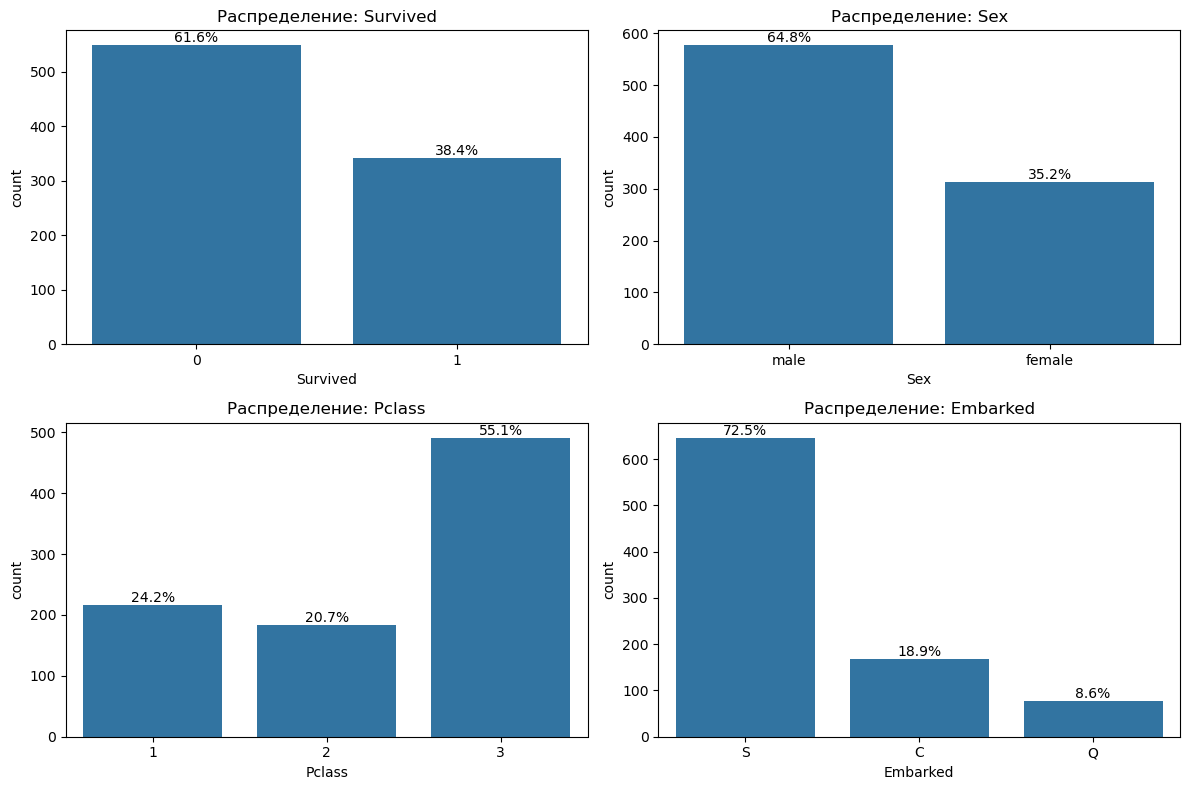

In [12]:
# Графики распределения с подписями процентов:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Список переменных и соответствующих осей:
features = ['Survived', 'Sex', 'Pclass', 'Embarked']
axes_list = [axes[0, 0], axes[0, 1], axes[1, 0], axes[1, 1]]

for feature, ax in zip(features, axes_list):
    # Строим график:
    sns.countplot(x=feature, data=df, ax=ax)

    # Добавляем процентные подписи над столбцами:
    total = len(df)
    for p in ax.patches:
        count = p.get_height()
        percent = 100 * count / total
        ax.annotate(f'{percent:.1f}%', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', fontsize=10, color='black')

    # Заголовок для графика:
    ax.set_title(f'Распределение: {feature}')

plt.tight_layout()
plt.show()

__Вывод__: 
1. Целевая переменная (Survived) несбалансирована: около 62% пассажиров не выжили и только 38% — выжили. Это важно учитывать при моделировании, чтобы модель не "заваливалась" в сторону большинства;

2. Распределение по полу неравномерное: мужчин значительно больше (~65%), чем женщин (~35%). Это может повлиять на итоговую модель, особенно учитывая, что пол — один из ключевых факторов выживаемости;

3. Большинство пассажиров ехали в 3-м классе (55%), что отражает социальное распределение на борту. Первый класс составил около 25%, второй — 20%. Видно, что класс влияет на шансы выжить;

4. Порт посадки также неравномерно распределён:
    - ~72% - (S);
    - ~19% - (C);
    - ~9% - (Q).                 

    Это может отражать косвенную связь между портом, классом и шансами выжить (например, пассажиры из C чаще ехали в 1-м классе).


#### 1.2.2 Количественные признаки:

В нашем анализе используем для распределения следующие признаки:
- Age (Дает понять, были ли на борту дети, пожилые и тд);
- Fare (Отражает класс, социальный статус и потенциальное влияние на выживаемость).

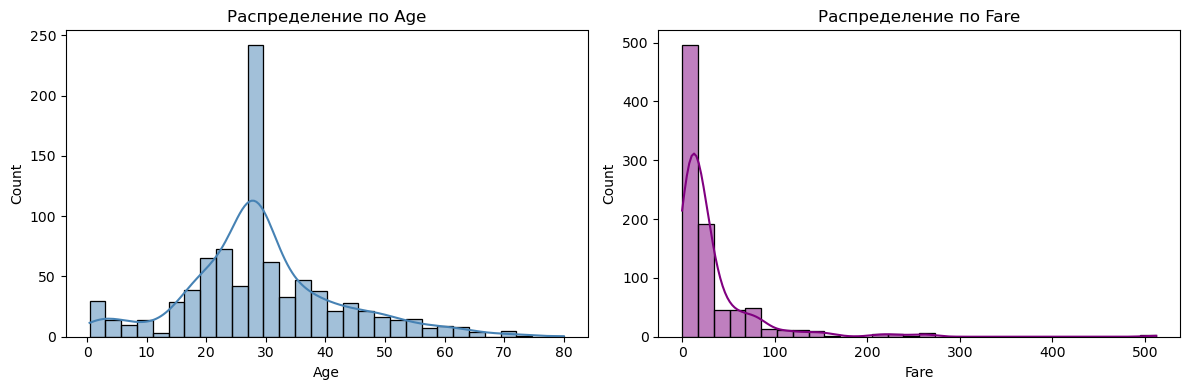

In [13]:
# Гистограммы распределения возраста и тарифа:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(df['Age'].dropna(), bins=30, kde=True, ax=axes[0], color='steelblue')
sns.histplot(df['Fare'], bins=30, kde=True, ax=axes[1], color='purple')
axes[0].set_title('Распределение по Age'); axes[1].set_title('Распределение по Fare')
plt.tight_layout()
plt.show()


__Вывод__:
1. По возрасту (Age):
    - Большинство пассажиров имело возраст от 18 до 40 лет;
    - Медиана 28 лет;
    - Видно выброс пассажиров 28 лет (это повлияло заполнение пропусков, на этапе моделирования это никак не мешает);
    - В качестве пассажирова присутствуют младенцы от 0 до 5 лет;
    - Распределение слегка скошено влево (молодые пассажиры преобладают).

2. По стоимости билета (Fare):
    - Большинство пассажиров приобретало дешевые билеты до 50 фунтов;
    - Средняя стоимость заметно выше медианы;
    - Логарифмирование Fare может быть полезным на этапе моделирования, что снизить разброс.

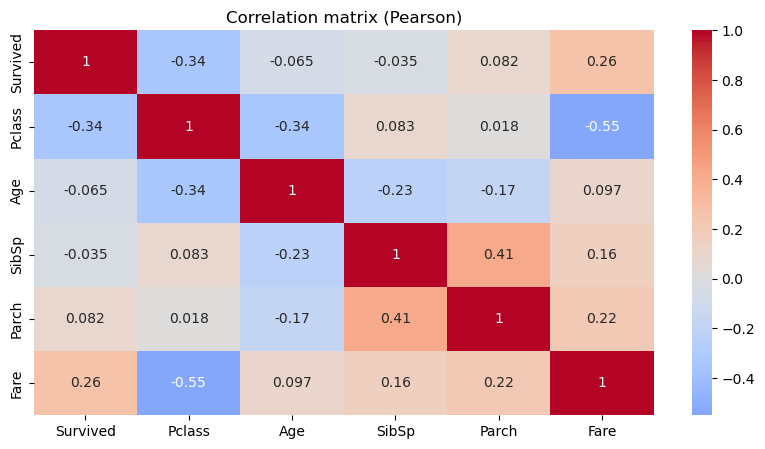

In [14]:
# Выбор числовых признаков
numeric_features = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

# Вычисление матрицы корреляций Пирсона
corr_matrix = df[numeric_features].corr()

# Визуализация полной матрицы корреляций
plt.figure(figsize=(10, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation matrix (Pearson)')
plt.show()


__Вывод__:
1. Survived имеет умеренную отрицательную корреляцию с Pclass (-0.34) и положительную с Fare (0.26). Это означает: пассажиры из 1-го класса (Pclass=1, что численно меньше) выживали чаще, а из 3-го класса (Pclass=3) – реже; также те, кто заплатил более высокий тариф (Fare), имели больше шансов выжить. Эти корреляции отражают социально-экономический фактор: класс и стоимость билета связаны с шансами на спасение;

2. Корреляция Survived с Age близка к нулю (-0.08), что указывает на слабую линейную связь между возрастом и фактом выживания. С SibSp корреляция также очень слабая (-0.04), с Parch чуть сильнее (0.08), но тоже небольшая. Это значит, что сами по себе численные значения этих переменных слабо связаны с выживаемостью.

3. Между независимыми признаками имеются собственные корреляции. Например, Pclass и Fare сильно отрицательно коррелируют (-0.55), ведь 1-й класс соответствует высоким ценам, а 3-й – низким. SibSp и Parch положительно коррелируют (0.41), что логично: у пассажиров с детьми часто были и супруги, т.е. общий размер семьи взаимосвязан. Age и Pclass тоже отрицательно коррелируют (-0.37) – пассажиры 1-го класса в среднем старше, а 3-го класса моложе. Таким образом, некоторые признаки не независимы, и при моделировании это нужно учитывать (например, Fare и Pclass лучше не использовать без учета их взаимосвязи).

#### 1.2.3 Парное распределение:

Для более детального обзора взаимосвязей между признаками и целевой переменной построим парные диаграммы (pairplot) для нескольких ключевых числовых признаков, отметив цветом выживаемость. Мы возьмем признаки Age, Fare, SibSp, Parch и на диаграммах отметим точки голубым цветом для выживших пассажиров и красным для погибших:

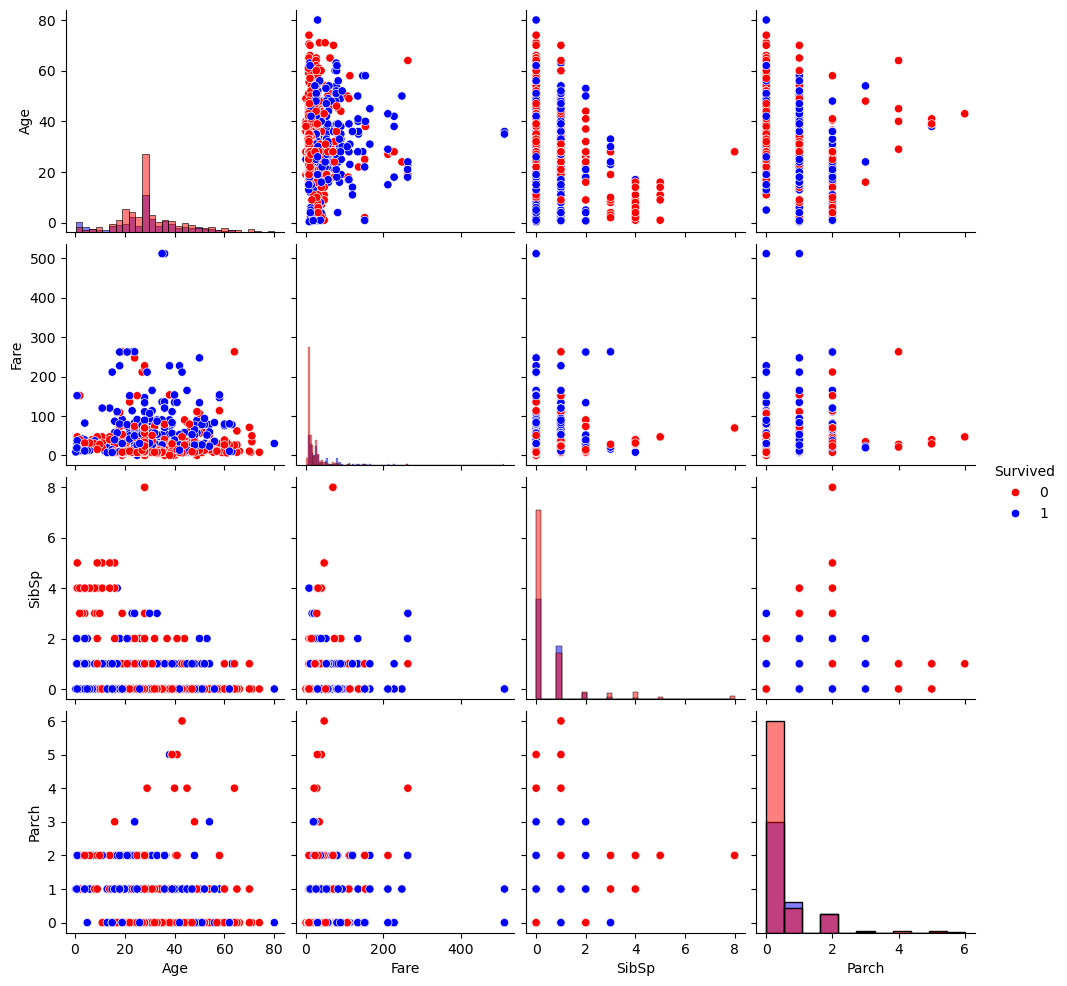

In [15]:
sns.pairplot(data=df, vars=['Age','Fare','SibSp','Parch'], hue='Survived', diag_kind='hist',
             palette={0:'red', 1:'blue'})
plt.show()


__Вывод__:
В целом, pairplot подтверждает предыдущие выводы и дает визуальное представление: выжившие чаще сконцентрированы в определенных областях признакового пространства (высокий Fare, низкий Pclass, небольшой размер семьи, низкий Age), тогда как погибшие доминируют в противоположных областях (низкий Fare, 3-й класс, очень большие семьи). Далее формально проверим влияние каждого из ключевых признаков на вероятность выжить.

### 1.3 Вывод:

Ключевые факторы, положительно влияющие на выживаемость: 
- это быть женщиной;
- быть в первом классе;
- быть ребенком;
- иметь небольшой семейный сопровождающий состав. 

Негативно сказываются: 
- третий класс; 
- мужской пол;
одиночество (если это мужчины) или очень большая семья;
-  а также низкая палуба (косвенно через класс и порт посадки). 
Эти наблюдения станут основой для построения модели предсказания.

In [ ]:
# Сохранение обработанного датасета в папку "datasets":
df.to_csv(r'./datasets/eda_titanic_dataset.csv', index=False)